In [1]:
#clutering
#centroid-based clustering
#K-means

In [2]:
#The algorithm has gained great popularity because it is easy to implement and scales well to large datasets. 
#However, it is difficult to predict the number of clusters,it can get stuck in local optimums,
# and it can perform poorly when the clusters are of varying sizes and density.

In [3]:
import numpy as np
x1 = np.array([0,1])
x2 = np.array([2,0])
np.sqrt(((x1-x2)**2).sum())

2.23606797749979

In [5]:
#Wine Data
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine

data = load_wine()
wine = pd.DataFrame(data.data, columns=data.feature_names)
wine.shape


(178, 13)

In [8]:
wine.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

In [9]:
wine.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


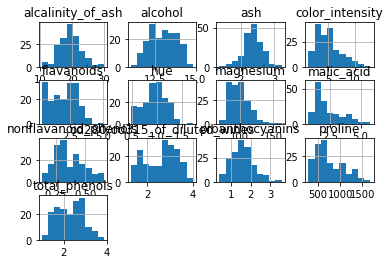

In [10]:
import matplotlib.pyplot as plt
wine.hist()
plt.show()

In [12]:
wine.iloc[:,:3].describe()

,alcohol,malic_acid,ash
count,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517
std,0.811827,1.117146,0.274344
min,11.030000,0.740000,1.360000
25%,12.362500,1.602500,2.210000
50%,13.050000,1.865000,2.360000
75%,13.677500,3.082500,2.557500
max,14.830000,5.800000,3.230000


In [13]:
#Another way to check for column names and the datatype of each column is to use .info().


In [14]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

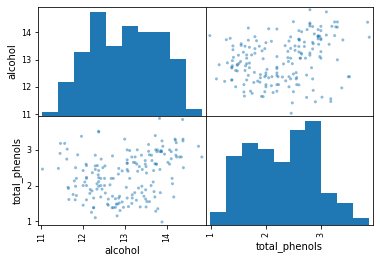

In [18]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
scatter_matrix(wine.iloc[:,[0,5]])
plt.show()

In [19]:
#No matter whether it is a supervised or unsupervised learning problem, 
#exploratory data analysis (EDA) is essential and strongly recommended before one dives into modeling.

In [20]:
X=wine[['alcohol','total_phenols']]

In [21]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(X)

StandardScaler()

In [22]:
scale.mean_

array([13.00061798,  2.29511236])

In [23]:
scale.scale_

array([0.80954291, 0.62409056])

In [24]:
X_scaled=scale.transform(X)

In [28]:
X_scaled.mean(axis=0)

array([ 7.84141790e-15, -1.95536471e-16])

In [29]:
X_scaled.std(axis=0)

array([1., 1.])

In [31]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3)
kmeans.fit(X_scaled)
y_pred=kmeans.predict(X_scaled)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 2, 2,
       1, 2, 1, 2, 0, 1, 0, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1])

In [32]:
kmeans.cluster_centers_

array([[ 0.05253603, -1.14020926],
       [ 0.92017418,  0.87087204],
       [-1.06183503,  0.08414606]])

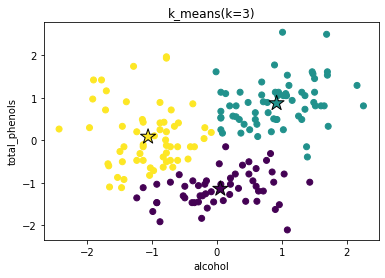

In [33]:
import matplotlib.pyplot as plt
plt.scatter(X_scaled[:,0],
           X_scaled[:,1],
           c=y_pred)
plt.scatter(kmeans.cluster_centers_[:,0],
           kmeans.cluster_centers_[:,1],
           marker = "*",
           s=250,
           c=[0,1,2],
           edgecolors = 'k')
plt.xlabel('alcohol')
plt.ylabel('total_phenols')
plt.title('k_means(k=3)')
plt.show()

In [34]:
#K-means divides wines into three groups: low alcohol but high total phenols (upper right in green),
# high alcohol and high total phenols (upper left in yellow), 
# and low total phenols (bottom in purple)

In [35]:
X_new = np.array([[13,2.5]])

In [36]:
X_new_scaled = scale.transform(X_new)
X_new_scaled

array([[-0.00076337,  0.32829793]])

In [37]:
kmeans.predict(X_new_scaled)

array([1])

In [38]:
#One major shortcoming of k-means is that the random initial guess for the centroids can result in bad clustering, 
# and k-means++ algorithm addresses this obstacle by specifying a procedure to initialize the centroids before proceeding 
# with the standard k-means algorithm. 
# In scikit-learn, the initialization mechanism is set to k-means++, by default.

In [39]:
kmeans=KMeans(n_clusters=2)
kmeans.fit(X_scaled)
kmeans.inertia_

185.25081541190127

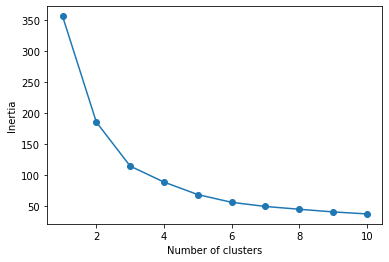

In [42]:
import numpy as np
inertia = []
for i in np.arange(1,11):
    km = KMeans(
    n_clusters = i
    )
    km.fit(X_scaled)
    inertia.append(km.inertia_)
plt.plot(np.arange(1,11),inertia,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [43]:
#For example, k=3 seems to be optimal, as we increase the number of clusters from 3 to 4, 
# the decrease in inertia slows down significantly, compared to that from 2 to 3. This approach is called elbow method

In [44]:
#One single inertia alone is not suitable to determine the optimal k because the larger k is, the lower the inertia will be.

In [45]:
X=wine
scale=StandardScaler()
scale.fit(X)
X_scaled=scale.transform(X)

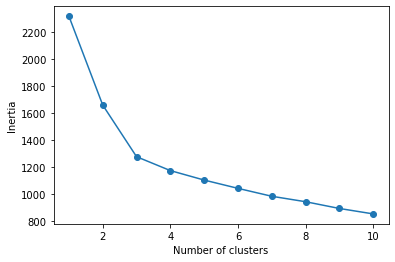

In [46]:
inertia =[]
for i in np.arange(1,11):
    km = KMeans(
    n_clusters=i
    )
    km.fit(X_scaled)
    inertia.append(km.inertia_)
plt.plot(np.arange(1,11),inertia,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [47]:
k_opt=3
kmeans=KMeans(k_opt)
kmeans.fit(X_scaled)
y_pred=kmeans.predict(X_scaled)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [48]:
#In practice, the features are often chosen by the collaboration between data scientists and domain knowledge experts.